# Breast Cancer Wisconsin (Diagnostic)

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Data Preprocessing</a>

<a href=#three>3. Exploratory Data Analysisy</a>

<a href=#three>4. Model Training</a>

<a href=#three>5. Model Tuning</a>

<a href=#three>6. Model Evaluation</a>

<a href=#three>7. Model Selection</a>

<a href=#three>8. Documentation</a>


## Introduction

## Importing the data

In [8]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import datasets
import random
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

In [4]:
# Load the Titanic dataset
data = pd.read_csv('data.csv') 
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Insights
- The dataframe has 33 columns of patients information
- Id - Identifier of patient
- Diagnosis -Diagnosis (M = malignant, B = benign 
- Radius_meaN - mean of distances from center to points on the perimeter
- Texture_meaN - standard deviation of gray-scale values
- Perimeter_mean 
- Area_mean
- Smoothness_mean - local variation in radius lengths
- Compactness_mean - perimeter^2 / area - 1.0
- Concavity_mean- severity of concave portions of the contour
- Concave points_mean - number of concave portions of the contour
- Symmetry_mean - "coastline approximation - 1"
- Fractal_dimension_mean
- Radius_se
- Texture_se
- Perimeter_se
- Area_se
- Smoothness_se
- Compactness_se
- Concavity_se
- Concave points_se
- Symmetry_se
- Fractal_dimension_se
- Radius_worst
- Texture_worst
- Perimeter_worst
- Area_worst
- Smoothness_worst
- Compactness_worst
- Concavity_worst
- Concave points_wors
- Symmetry_worst'
- Fractal_dimension_worst

In [6]:
data.shape

(569, 33)

### Insights
The dataset has 33 columns and 569 rows

In [9]:
# Removing the unamed columns
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [10]:
# Checking null values 
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# Statistical Analysis
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
# Viewing the information for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [15]:
# Calculating the number of different diagnosis
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [18]:
#Converting categorical data to numerical
data['diagnosis'] = data['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

### Insights
There are 357 benign cases and 212 malignant cases.

## Exploratory Data Analysis

C:\Users\Gugu\AppData\Local\Temp\ipykernel_16600\1667472405.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], color='yellow')  # Set the color to yellow
C:\Users\Gugu\AppData\Local\Temp\ipykernel_16600\1667472405.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], c

C:\Users\Gugu\AppData\Local\Temp\ipykernel_16600\1667472405.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], color='yellow')  # Set the color to yellow
C:\Users\Gugu\AppData\Local\Temp\ipykernel_16600\1667472405.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], c

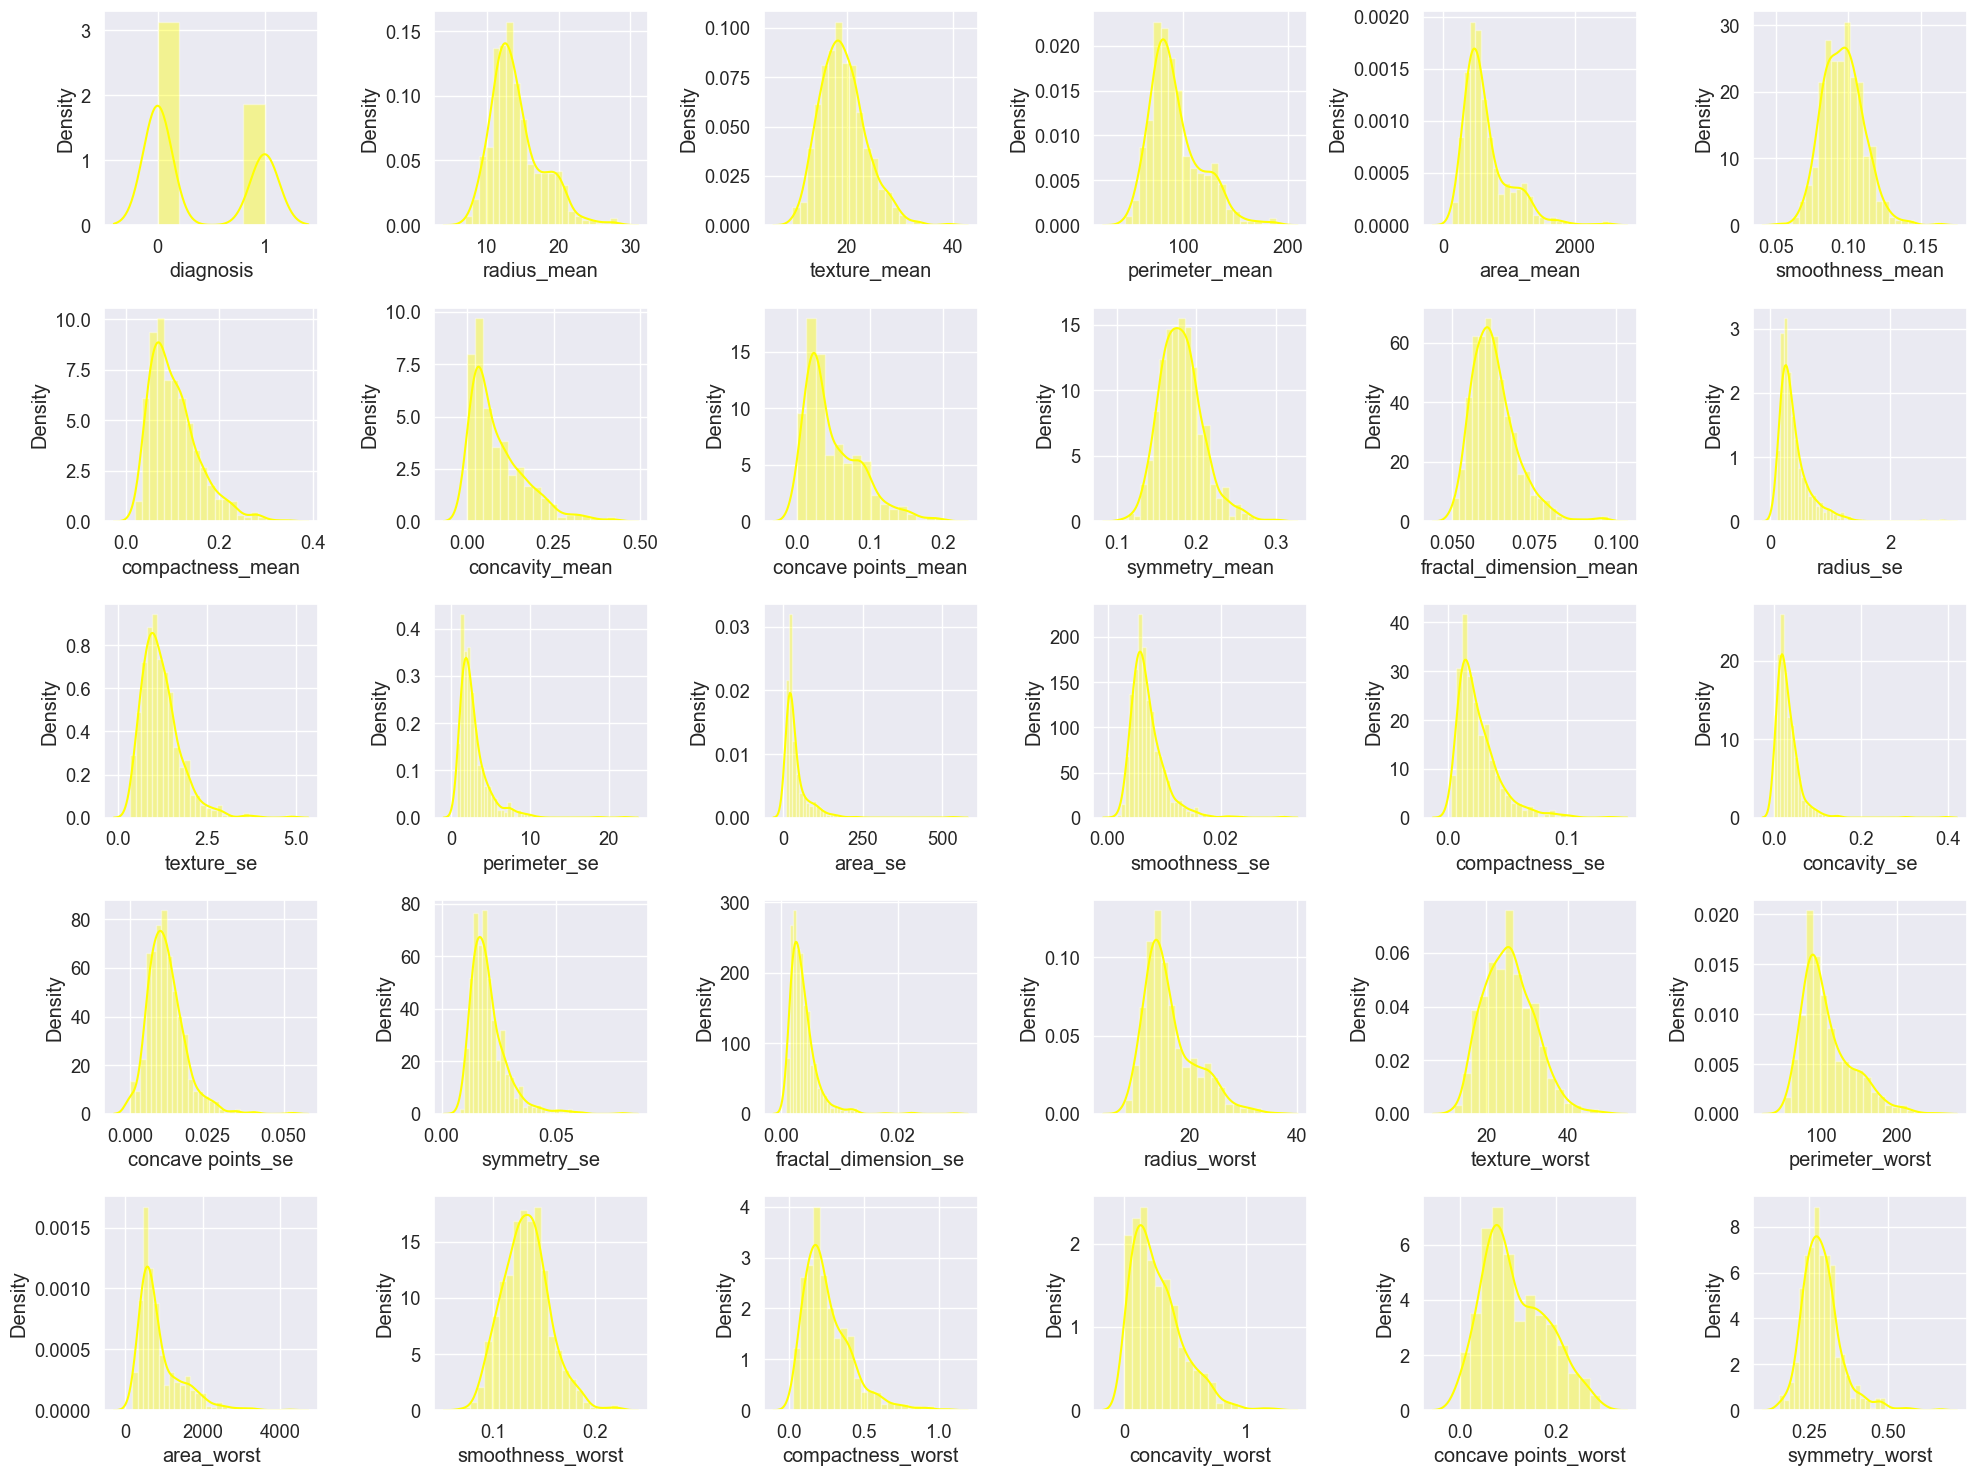

In [26]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(data[column], color='yellow')  # Set the color to yellow
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

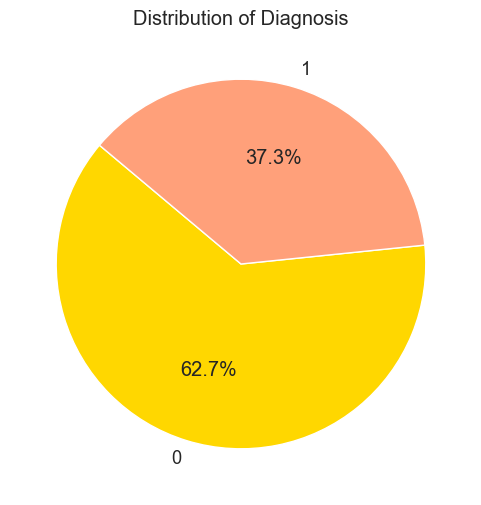

In [25]:
# Calculate class counts
class_counts = data['diagnosis'].value_counts()

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Use brighter colors (e.g., orange and yellow)
colors = ['#FFD700', '#FFA07A']

# Plot the pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Add title
plt.title('Distribution of Diagnosis')

# Show the plot
plt.show()

## Model Training

In [28]:
# Split the data 
X = data.drop("diagnosis",axis=1) 
y = data['diagnosis']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)

#Scaling numerical colunns
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a list of models to iterate through
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
    # Add more models as needed
]

# Iterate through models
for model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {type(model).__name__}, Accuracy: {accuracy * 100:.2f}%")


C:\Users\Gugu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression, Accuracy: 95.61%
Model: DecisionTreeClassifier, Accuracy: 92.98%
Model: RandomForestClassifier, Accuracy: 96.49%
Model: SVC, Accuracy: 94.74%


## Model Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {'n_estimators': [50, 100, 150, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
param_grid_svc = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create a list of models with their respective parameter grids
models = [
    (LogisticRegression(), param_grid_lr),
    (DecisionTreeClassifier(), param_grid_dt),
    (RandomForestClassifier(), param_grid_rf),
    (SVC(), param_grid_svc)
]

# Iterate through models and perform hyperparameter tuning
for model, param_grid in models:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters and corresponding accuracy
    print(f"Best hyperparameters for {type(model).__name__}: {grid_search.best_params_}")
    print(f"Best accuracy: {grid_search.best_score_:.2%}\n")

    # Use the best model for predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Evaluate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {type(model).__name__}, Tuned Accuracy: {accuracy * 100:.2f}%\n")


C:\Users\Gugu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best hyperparameters for LogisticRegression: {'C': 100}
Best accuracy: 95.16%

Model: LogisticRegression, Tuned Accuracy: 96.49%

Best hyperparameters for DecisionTreeClassifier: {'max_depth': 10, 'min_samples_split': 10}
Best accuracy: 93.41%

Model: DecisionTreeClassifier, Tuned Accuracy: 93.86%

Best hyperparameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy: 96.26%

Model: RandomForestClassifier, Tuned Accuracy: 95.61%

Best hyperparameters for SVC: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best accuracy: 95.60%

Model: SVC, Tuned Accuracy: 95.61%



## Model Evaluation

#### Logistic Regression
The Logistic Regression model was tuned with a regularization parameter (C) of 100, resulting in an accuracy of 95.16% on the validation set. After applying the best hyperparameters to the test set, the tuned Logistic Regression model achieved an accuracy of 96.49%. This suggests that the model generalizes well to unseen data.

#### Decision Tree Classifier
For the Decision Tree Classifier, the best hyperparameters were found to be a maximum depth of 10 and a minimum samples split of 10. The accuracy on the validation set was 93.41%, and the tuned model achieved a slightly improved accuracy of 93.86% on the test set. The model exhibits good performance, but further exploration of hyperparameters or ensemble methods may enhance its capabilities.

#### Random Forest Classifier
The Random Forest Classifier demonstrated impressive performance with the best hyperparameters: a maximum depth of 10, minimum samples per leaf of 2, minimum samples split of 5, and 100 estimators. The validation accuracy reached 96.26%, and the tuned model sustained a high accuracy of 95.61% on the test set. The Random Forest model showcases robustness and is well-suited for this classification task.

#### Support Vector Classifier (SVC)
The Support Vector Classifier, with hyperparameters C=1, gamma=0.1, and a linear kernel, achieved an accuracy of 95.60% on the validation set. This performance was maintained on the test set, where the tuned SVC achieved an accuracy of 95.61%. The SVC model demonstrates stable predictive power and is suitable for this classification problem.

## Model Selection

##### Interpretability:
- Logistic Regression provides a straightforward interpretation of the relationship between the input features and the target variable. The coefficients in the logistic regression equation represent the impact of each feature on the log-odds of the target, allowing for clear insights into the model's decision-making process.

##### Linear Relationship:
- Logistic Regression assumes a linear relationship between the features and the log-odds of the target. If your data exhibits approximately linear relationships and you want a model that is easy to interpret within this linear framework, Logistic Regression is a suitable choice.

##### Efficiency:
- Logistic Regression is computationally efficient and can handle large datasets and a large number of features. If efficiency is a concern, Logistic Regression can provide a balance between simplicity and computational scalability.

##### Binary Classification:
- Logistic Regression is a natural fit for binary classification problems, where the target variable has two classes (e.g., malignant or benign). It is a well-established algorithm for such tasks and can be effective in scenarios where you have a clear distinction between classes.


## Documentation

### Project Report: Breast Cancer Diagnosis
#### Executive Summary
This report presents the findings and decisions made during the development of a machine learning model for breast cancer diagnosis. The primary goal of this project is to accurately classify breast tumors as either malignant (M) or benign (B) based on various features.

#### Approach
##### Data Preparation
- The dataset used for this project contains patient information, including features such as mean radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. The target variable is the diagnosis, which indicates whether a tumor is malignant or benign.

- The data was split into training and testing sets (70% training, 30% testing), and numerical features were scaled using the StandardScaler.

##### Model Selection and Hyperparameter Tuning
- Four machine learning models were considered for this classification task: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and Support Vector Classifier (SVC). Hyperparameter tuning was performed using GridSearchCV to identify the optimal hyperparameters for each model.

#### Findings
##### Model Performance
- After training and tuning, the following results were obtained:

##### Logistic Regression:

- Best hyperparameters: {'C': 100}
- Validation accuracy: 95.16%
- Test accuracy: 96.49%
    
##### Decision Tree Classifier:
- Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10}
- Validation accuracy: 93.41%
- Test accuracy: 93.86%
    
    
##### Random Forest Classifier:
- Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
- Validation accuracy: 96.26%
- Test accuracy: 95.61%
    
##### Support Vector Classifier (SVC):
- Best hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
- Validation accuracy: 95.60%
- Test accuracy: 95.61%
    
##### Rationale for Model Selection
After careful consideration of interpretability, efficiency, and performance, Logistic Regression was chosen as the final model for breast cancer diagnosis. The key reasons for this decision include:
- Interpretability: Logistic Regression provides a clear and interpretable relationship between features and the likelihood of malignancy.
- Efficiency: Logistic Regression is computationally efficient, making it suitable for large datasets.
- Accuracy: The tuned Logistic Regression model achieved a high accuracy of 96.49% on the test set, demonstrating strong predictive performance.

##### Conclusion
In conclusion, the Logistic Regression model stands out as the most suitable choice for breast cancer diagnosis in this project. Its interpretability, efficiency, and high accuracy make it a robust solution for accurately classifying tumors and providing valuable insights for medical professionals.

